In [73]:
import yfinance as yf
import pandas as pd
import numpy as np

In [58]:
df = pd.read_csv('regression_data_set.csv')
df = df.set_index('date')

from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
def encode(data):
    return lab_enc.fit_transform(data)

In [59]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df[['fcurr_ir', 'fcurr_inf', 'fcurr_unem', 'fcurr_gdp', 'scurr_ir', 'scurr_inf', 'scurr_unem', 'scurr_gdp']]
y = df["exchange_rate"]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.3)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
#print(classification_report(y_test, y_pred))

In [60]:
df["predicted_signal"] = model.predict(X)
df["predicted_signal"] = df["predicted_signal"].shift(1)  # чтобы избежать lookahead bias

In [61]:
df["signal"] = None

In [62]:
df = df.reset_index()

In [63]:
df

,date,Unnamed: 0,fcurr_ir,fcurr_inf,fcurr_unem,fcurr_gdp,scurr_ir,scurr_inf,scurr_unem,scurr_gdp,exchange_rate,predicted_signal,signal
0,2016-04-21,215,0.00,0.0,10.3,0.3,-0.10,0.0,3.2,-0.3,123.510,NaN,None
1,2016-06-02,216,0.00,-0.2,10.2,0.5,-0.10,-0.3,3.2,-0.3,121.383,121.75390,None
2,2016-07-21,217,0.00,0.1,10.1,0.5,-0.10,-0.3,3.2,0.5,116.785,120.73107,None
3,2016-09-08,218,0.00,0.2,10.1,0.3,-0.10,-0.5,3.1,0.5,115.327,118.34374,None
4,2016-10-20,219,0.00,0.4,10.1,0.3,-0.10,-0.5,3.0,0.2,113.645,115.72751,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2024-12-12,284,3.15,2.0,6.3,0.4,0.25,2.4,2.4,0.7,159.739,128.57371,None
70,2025-01-30,285,2.90,2.4,6.3,0.4,0.50,3.0,2.5,0.3,160.291,127.92581,None
71,2025-03-06,286,2.65,2.5,6.2,0.1,0.50,3.0,2.5,0.3,159.537,128.05678,None
72,2025-04-17,287,2.40,2.2,6.1,0.1,0.50,3.2,2.5,0.6,161.873,127.37814,None


In [64]:
from datetime import datetime

In [65]:
for i in range(len(df)):
    el = df.iloc[i]
    if(el['exchange_rate'] > el['predicted_signal']):
        df.at[i, 'signal'] = -1
    elif(el['exchange_rate'] < el['predicted_signal']):
        df.at[i, 'signal'] = 1
    df.at[i, 'date'] = datetime.strptime(df.at[i, 'date'], "%Y-%m-%d")

In [66]:
df

,date,Unnamed: 0,fcurr_ir,fcurr_inf,fcurr_unem,fcurr_gdp,scurr_ir,scurr_inf,scurr_unem,scurr_gdp,exchange_rate,predicted_signal,signal
0,2016-04-21 00:00:00,215,0.00,0.0,10.3,0.3,-0.10,0.0,3.2,-0.3,123.510,NaN,None
1,2016-06-02 00:00:00,216,0.00,-0.2,10.2,0.5,-0.10,-0.3,3.2,-0.3,121.383,121.75390,1
2,2016-07-21 00:00:00,217,0.00,0.1,10.1,0.5,-0.10,-0.3,3.2,0.5,116.785,120.73107,1
3,2016-09-08 00:00:00,218,0.00,0.2,10.1,0.3,-0.10,-0.5,3.1,0.5,115.327,118.34374,1
4,2016-10-20 00:00:00,219,0.00,0.4,10.1,0.3,-0.10,-0.5,3.0,0.2,113.645,115.72751,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2024-12-12 00:00:00,284,3.15,2.0,6.3,0.4,0.25,2.4,2.4,0.7,159.739,128.57371,-1
70,2025-01-30 00:00:00,285,2.90,2.4,6.3,0.4,0.50,3.0,2.5,0.3,160.291,127.92581,-1
71,2025-03-06 00:00:00,286,2.65,2.5,6.2,0.1,0.50,3.0,2.5,0.3,159.537,128.05678,-1
72,2025-04-17 00:00:00,287,2.40,2.2,6.1,0.1,0.50,3.2,2.5,0.6,161.873,127.37814,-1


In [67]:
df = df.set_index('date')

c:\Users\sdziu\my_documents\FM\forex\.venv\lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [70]:
df

,Unnamed: 0,fcurr_ir,fcurr_inf,fcurr_unem,fcurr_gdp,scurr_ir,scurr_inf,scurr_unem,scurr_gdp,exchange_rate,predicted_signal,signal
date,,,,,,,,,,,,
2016-04-21,215,0.00,0.0,10.3,0.3,-0.10,0.0,3.2,-0.3,123.510,NaN,None
2016-06-02,216,0.00,-0.2,10.2,0.5,-0.10,-0.3,3.2,-0.3,121.383,121.75390,1
2016-07-21,217,0.00,0.1,10.1,0.5,-0.10,-0.3,3.2,0.5,116.785,120.73107,1
2016-09-08,218,0.00,0.2,10.1,0.3,-0.10,-0.5,3.1,0.5,115.327,118.34374,1
2016-10-20,219,0.00,0.4,10.1,0.3,-0.10,-0.5,3.0,0.2,113.645,115.72751,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-12,284,3.15,2.0,6.3,0.4,0.25,2.4,2.4,0.7,159.739,128.57371,-1
2025-01-30,285,2.90,2.4,6.3,0.4,0.50,3.0,2.5,0.3,160.291,127.92581,-1
2025-03-06,286,2.65,2.5,6.2,0.1,0.50,3.0,2.5,0.3,159.537,128.05678,-1


100%|██████████| 1/1 [00:00<00:00, 16.15it/s]


<Axes: title={'center': 'ML Strategy - Equity Curve'}>

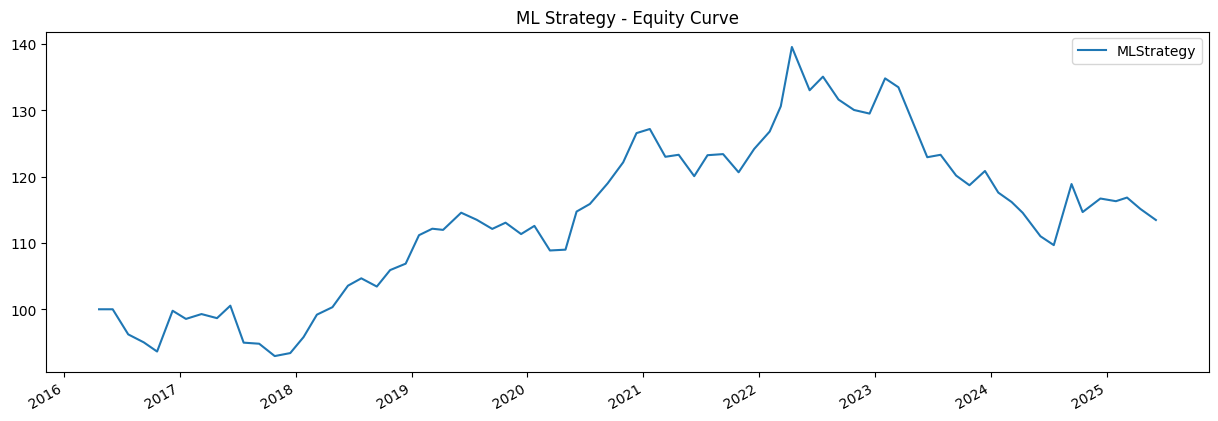

In [71]:
import bt

def run_ml_strategy(df):
    price = df[["exchange_rate"]]
    signal = df[["signal"]]
    signal = signal.rename(columns={'signal':'exchange_rate'})
    # Преобразуем сигнал 0/1 → -1/+1 для bt.py
    #signal = signal.replace({0: -1, 1: 1})

    strategy = bt.Strategy(
        "MLStrategy",
        [
            bt.algos.RunDaily(),
            bt.algos.SelectAll(),
            bt.algos.WeighTarget(signal),
            bt.algos.Rebalance()
        ]
    )

    backtest = bt.Backtest(strategy, price)
    return bt.run(backtest)

result = run_ml_strategy(df)
result.plot(title="ML Strategy - Equity Curve")

In [72]:
stats = result[0].stats
print("Sharpe Ratio:", stats.loc["daily_sharpe"])
print("CAGR:", stats.loc["cagr"])
print("Max Drawdown:", stats.loc["max_drawdown"])

Sharpe Ratio: 1.207674894708597
CAGR: 0.01394042705927001
Max Drawdown: -0.21415766774854506
